# Exploration des données
## Radiogrpahie COVID-19
### _Asma, Mamaar, Richard_
---

#### Contexte :
<div align='justify'>
2020, une année qui a tristement marqué le monde entier. Une pandémie d'ordre mondiale a figé la planète.
Les chercheurs et medecins du monde entier ont travaillé ensemble afin de trouver rapidement un vaccin pour stopper la propagation de ce virus.
Le temps était compté, les malades graves et les décès s'accumulaient. Le diagnostique de la maladie est une étape clé dans la prise en charge d'un patient. Grâce aux outils informatiques, nous pouvons contribuer à la modélisation d'un outil de diagnostique performant.
Pour ce faire, notre travail est basé sur une banque de données contenant des radiographies de poumons de différentes catégories. Des radiographies de personnes non malades et des radiographies de patients atteints du COVID. Pour éviter un mauvais diagnotique, des radiographies de patients atteints d'autres pneumonies virales mais également des radiographies avec une opacité pulmonaire dont la cause est inconnu sont ajoutés aux données. Ce jeu de données permet d'entrainer le modèle à reconnaitre spécifiquement les patients atteints du COVID-19.
La première étape de ce travail consiste en l'exploration des données et leur pré-traitement dans l'objectif de leur exploitation.
</div>

---


#### Point de vue technique

<div align='justify'>

Ce projet utilisera des techniques d'apprentissage profond, en particulier les réseaux neuronaux convolutifs (CNN), pour l'analyse automatisée d'images radiologiques. Le défi technique principal sera d'adapter et d'améliorer ces algorithmes afin de traiter avec efficacité d'importants ensembles de données d'images médicales, tout en assurant une grande exactitude dans l'identification des diverses maladies pulmonaires.
</div>

----

#### Point de vue économique

<div align='justify'>

Ce système, en permettant un diagnostic plus rapide et précis, peut diminuer les dépenses associées aux erreurs de diagnostic et aux examens supplémentaires. En situation de pandémie, un outil automatisé efficace permet d'accélérer la prise en charge des cas potentiels, ce qui représente un atout important pour les structures de soins.
</div>

------
##### Point de vue scientifique

<div align='justify'>

Ce travail s'inscrit dans le cadre de la recherche pratique en imagerie numérique médicale, un secteur en fort développement. Il examine le potentiel des réseaux neuronaux convolutifs (CNN) pour identifier des éléments distinctifs dans les radiographies, notamment pour le repérage de la Covid-19. De cette manière, il participe à la confirmation et au perfectionnement des approches d'intelligence artificielle dans un environnement médical important.
</div>

-----

#### Objectifs

Les buts de ce projet sont les suivants :

<ul>

**.**	Développer un modèle d'apprentissage profond pour catégoriser automatiquement des images radiographiques des poumons, en se concentrant principalement sur l'identification du Covid-19.

**.**	Traiter et utiliser des données d'imagerie médicale, en veillant à un pré-traitement approprié et à une administration efficiente des données.

**.**	Mesurer avec soin l'efficacité du modèle en utilisant des indicateurs de référence (précision, rappel, F1-score, etc.).

**.**	Ajuster finement les paramètres du réseau pour atteindre un équilibre optimal entre précision et rapidité d'exécution.

</ul>

-----

#### Jeu de données utilisés

<div align='justify'>

Dans le cadre de ce projet, nous avons exploité plusieurs ensembles de données publics de radiographies thoraciques disponibles sur des plateformes ouvertes telles que Kaggle. Ces jeux de données regroupent des images classées en quatre catégories principales : 
<ul>

•	Covid-19,\
•	Pneumonie virale,\
•	Opacité pulmonaire,\
•	et radiographies normales.\
</ul>

Chaque ensemble est associée à des métadonnées cliniques fournies sous forme de fichiers Excel, contenant des informations techniques sous forme de colonnes telles que :

<ul>
    
•	File Name (NORMAL-1, COVID-1, Lung_Opacity-1, Viral Pneumonia-1),\
•	Format (PNG),\
•	Size (256*256),\
•	et URL (https://www.kaggle.com/c/rsna-pneumonia-detect...)

</ul>
Bien que ces métadonnées ne contiennent pas d’annotations cliniques détaillées, elles permettent une gestion efficace des fichiers et facilitent l’automatisation du chargement et du prétraitement des données.
  
</ul>
</div>

----

#### Variables clés


<div align='justify'>

Les données primaires utilisées dans ce projet sont les images radiologiques, qui constituent la source d’information principale pour l’entraînement du modèle. Ces images fournissent les caractéristiques visuelles nécessaires à l’extraction des signaux discriminants.

Les métadonnées associées jouent un rôle crucial en fournissant les labels exacts correspondant à chaque image. Ces labels représentent la variable cible dans le cadre de l’apprentissage supervisé, permettant ainsi au modèle de s’ajuster pour prédire correctement les classes pathologiques (Covid-19, pneumonie, etc.)

</div>

------

#### Variable cible 


<div align='justify'>

La variable cible est la classe de diagnostic attribuée à chaque radiographie : Covid-19, Pneumonie Virale, Opacité pulmonaire, ou Normal.

</div>

-----

#### Limites des données 


<div align='justify'>

Le déséquilibre des classes constitue une contrainte importante. Par ailleurs, certaines images présentent des résolutions et des contrastes variables, ce qui peut compliquer l’apprentissage.

</div>


# I/ Les images & masks

## 1. Importation des données

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import json
from pathlib import Path

In [2]:
# Dans quel dossier je me trouve
display(os.getcwd())
# Je vais dans le dossier qui contient mes data
os.chdir("C:/Users/Asma/Documents/DataScientest/Projet")
print("\nLes dossiers et fichiers contenant les données:")
display(os.listdir("data_covid"))
print("\nLes sous-dossiers de chaque catégorie:")
os.listdir("data_covid/COVID")

'C:\\Users\\Asma\\Documents\\DataScientest\\Projet\\SEP25-BDS-COVID\\Notebooks'


Les dossiers et fichiers contenant les données:


['COVID',
 'COVID.metadata.xlsx',
 'Lung_Opacity',
 'Lung_Opacity.metadata.xlsx',
 'Normal',
 'Normal.metadata.xlsx',
 'README.md.txt',
 'Viral Pneumonia',
 'Viral Pneumonia.metadata.xlsx']


Les sous-dossiers de chaque catégorie:


['images', 'masks']

La structure du dossier contenant les données semble répondre à ce schémas :
```
data_covid
        |___COVID
        |      |__images
        |      |__masks
        |
        |___Lung_Opacity
        |      |__images
        |      |__masks
        |
        |___Normal
        |      |__images
        |      |__masks
        |
        |___Viral Pneumonia
               |__images
               |__masks
```

---

## 2. Vérification de l'homogéinité des données 

In [3]:
# On compte le nombre de fichiers par dossier
chemin_principal = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid"
resultats = []
for dossier in os.listdir(chemin_principal):
    chemin_dossier = os.path.join(chemin_principal, dossier)
    if not os.path.isdir(chemin_dossier):
        continue
    chemin_images = os.path.join(chemin_dossier, "images")
    chemin_masks = os.path.join(chemin_dossier, "masks")
    if os.path.isdir(chemin_images):
        nb_images = len(os.listdir(chemin_images))
    else:
        nb_images = 0
    if os.path.isdir(chemin_masks):
        nb_masks = len(os.listdir(chemin_masks))
    else:
        nb_masks = 0
    resultats.append({"Catégorie":dossier, "Images":nb_images, "Masks":nb_masks})

On affiche le nombre d'images et de masks pour chacune des catégories :

,Images,Masks
Catégorie,,
COVID,3616,3616
Lung_Opacity,6012,6012
Normal,10192,10192
Viral Pneumonia,1345,1345


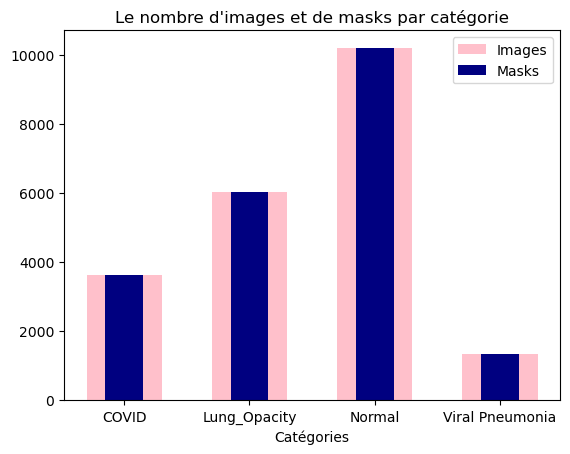

In [4]:
df = pd.DataFrame(resultats).set_index("Catégorie")

plt.bar(df.index, df['Images'], color='pink', width = 0.6, label = 'Images')
plt.bar(df.index, df['Masks'], color='navy', width = 0.3, label = 'Masks')
plt.xlabel('Catégories')
plt.title("Le nombre d'images et de masks par catégorie")
plt.legend()

df

On voit donc qu'il y a une grande disparité dans le nombre de d'images et de masks dans les différentes catégories.
Il faudra par la suite décider comment combler le manque de données, ou la suppression de certaines données.
Le point positif est que le nombre de masks correspond au nombre d'images.

---

## 3. Vérification de l'intégrité des données

On vérifie dans un premier temps que tous les fichiers possèdent la même extension. Ensuite, nous nous assurerons qu'aucun fichier n'est endommagé ou corrompu.

In [5]:
extension_images = []
extension_masks = []

for dossier in os.listdir(chemin_principal):
    if os.path.isdir(chemin_images):
        for f in os.listdir(chemin_images):
            ext = os.path.splitext(f)[1].lower()
            extension_images.append(ext)

    if os.path.isdir(chemin_masks):
        for f in os.listdir(chemin_masks):
            ext = os.path.splitext(f)[1].lower()
            extension_masks.append(ext)
            
print("Extentions dans images:\n", set(extension_images))
print("Extentions dans masks:\n", set(extension_masks))

Extentions dans images:
 {'.png'}
Extentions dans masks:
 {'.png'}


Toutes les images et tous les masks sont sous le format '.png'. 

In [6]:
images_corrompues = []
masks_corrompus = []

for dossier in os.listdir(chemin_principal):
    if os.path.isdir(chemin_images):
        for f in os.listdir(chemin_images):
            if cv2.imread(os.path.join(chemin_images, f)) is None :
                images_corrompues.append(f)

    if os.path.isdir(chemin_masks):
        for f in os.listdir(chemin_masks):
            if cv2.imread(os.path.join(chemin_masks, f)) is None :
                masks_corrompus.append(f)
                
print("Le nombre d'images corrompues est de:\n", len(images_corrompues))
print("Le nombre de masks corrompus est de:\n", len(masks_corrompus))

Le nombre d'images corrompues est de:
 0
Le nombre de masks corrompus est de:
 0


Aucun fichier n'est corrompu.

---

## 4. La taille des images et masks

In [7]:
tailles_images = []
tailles_masks = []

for dossier in os.listdir(chemin_principal):
    if os.path.isdir(chemin_images):
        for f in os.listdir(chemin_images):
            img = cv2.imread(os.path.join(chemin_images, f), cv2.IMREAD_GRAYSCALE)
            if img is not None :
                h, l = img.shape
                tailles_images.append((h, l))

    if os.path.isdir(chemin_masks):
        for f in os.listdir(chemin_masks):
            msk = cv2.imread(os.path.join(chemin_masks, f), cv2.IMREAD_GRAYSCALE)
            if msk is not None :
                h, l = msk.shape
                tailles_masks.append((h, l))
                
print("La taille des images est:\n", set(tailles_images))
print("La taille des masks est:\n", set(tailles_masks))

La taille des images est:
 {(299, 299)}
La taille des masks est:
 {(256, 256)}


On constate que toutes les images ont la même taille. Et les masks également ont la même taille. Les images et les masks sont en niveaux de gris.
Cependant, les masks n'ont pas la même taille que les images, il va donc falloir redimensionner les images.

---
---

# II/ Les métadonnées

## 1. Importation des métadonnées

In [8]:
# On ouvre les fichiers des métadonnées, fichiers excel.
meta_covid = pd.read_excel("C:/Users/Asma/Documents/DataScientest/Projet/data_covid/COVID.metadata.xlsx")
display(meta_covid.head())
meta_lung = pd.read_excel("C:/Users/Asma/Documents/DataScientest/Projet/data_covid/Lung_Opacity.metadata.xlsx")
display(meta_lung.head())
meta_normal = pd.read_excel("C:/Users/Asma/Documents/DataScientest/Projet/data_covid/Normal.metadata.xlsx")
display(meta_normal.head())
meta_viral = pd.read_excel("C:/Users/Asma/Documents/DataScientest/Projet/data_covid/Viral Pneumonia.metadata.xlsx")
display(meta_viral.head())

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,Lung_Opacity-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,Lung_Opacity-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


Les fichiers excel de metadonnées n'apportent pas plus d'informations sur les radiographies (age, genre, ... des patients). Cependant, nous allons pouvoir vérifier les informations sur la tailles et le format des images vues précédement.

---

## 2. Nombre d'images

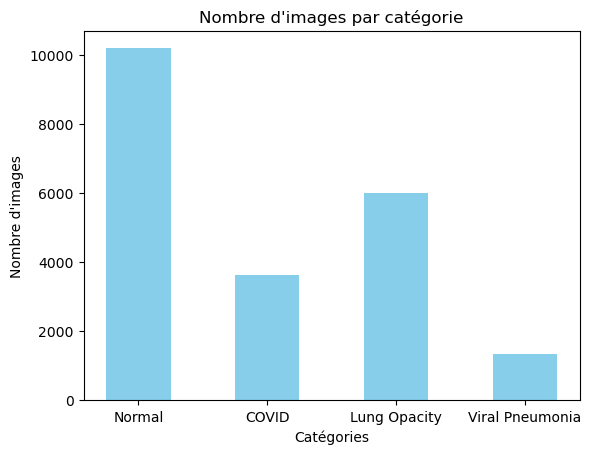

,Nombre d'images
Catégories,
Normal,10192
COVID,3616
Lung Opacity,6012
Viral Pneumonia,1345


In [27]:
nb_img = {'Normal' : len(meta_normal),
               'COVID' : len(meta_covid),
               'Lung Opacity' : len(meta_lung),
               'Viral Pneumonia' : len(meta_viral)}
df_nb = pd.DataFrame(list(nb_img.items()), columns=["Catégories", "Nombre d'images"]).set_index("Catégories")
plt.bar(df_nb.index, df_nb["Nombre d'images"], color='skyblue', width =0.5)
plt.title("Nombre d'images par catégorie")
plt.xlabel("Catégories")
plt.ylabel("Nombre d'images")
plt.show()
df_nb

Les valeurs correspondent bien au nombre d'images contenues dans les dossiers de données.

---

# 3. Format des images

In [23]:
format_img = {'Normal' : meta_normal['FORMAT'].unique(),
              'COVID' : meta_covid['FORMAT'].unique(),
              'Lung Opacity' : meta_lung['FORMAT'].unique(),
              'Viral Pneumonia' : meta_viral['FORMAT'].unique()}
df_format = pd.DataFrame(list(format_img.items()), columns=["Catégories", "Format d'images"]).set_index("Catégories")
df_format

,Format d'images
Catégories,
Normal,[PNG]
COVID,[PNG]
Lung Opacity,[PNG]
Viral Pneumonia,[PNG]


Les formats d'image de chaque catégorie est bien 'png', cela correspond bien à ce qui a été exploré sur les images des données.

---

# 4. Taille des images


In [26]:
taille_img = {'Normal' : meta_normal['SIZE'].unique(),
              'COVID' : meta_covid['SIZE'].unique(),
              'Lung Opacity' : meta_lung['SIZE'].unique(),
              'Viral Pneumonia' : meta_viral['SIZE'].unique()}
df_taille = pd.DataFrame(list(taille_img.items()), columns=["Catégories", "Taille d'images"]).set_index("Catégories")
df_taille

,Taille d'images
Catégories,
Normal,[256*256]
COVID,[256*256]
Lung Opacity,[256*256]
Viral Pneumonia,[256*256]


Nous constatons un format 256 x 256, ce qui correspond plutôt aux masks et non aux images. Les métadonnées sont celles des masques et non celles des images originales. 

---

# Extraction de la largeur et de l'hauteur et affichage de leurs statistiques descriptives

<ul>
<div style="border-left: 5px solid #00ffbf; padding: 10px; background: white;">
Celà permet d’avoir un contrôle fin sur les dimensions, d’adapter le traitement et d’assurer la cohérence des données.
</div>
</ul>

In [7]:

# Définition de la Base dir
#base_dir = "../../project/data/COVID-19_Radiography_Dataset/" 

# Chargement des fichiers 

#df_normal = pd.read_excel(base_dir + "Normal.metadata.xlsx")
#df_covid = pd.read_excel(base_dir + "COVID.metadata.xlsx")
#df_opacity = pd.read_excel(base_dir + "Lung_Opacity.metadata.xlsx")
#df_viral = pd.read_excel(base_dir + "Viral Pneumonia.metadata.xlsx")

# Dictionnaire pour les datasets

datasets = {
    'Normal': df_normal,
    'COVID': df_covid,
    'Lung_Opacity': df_opacity,
    'Viral_Pneumonia': df_viral
}

# Utilisons un loop for pour extraire la largeur et la hauteur de la colonne size
for name, df in datasets.items():
    df[['width', 'height']] = (
        df['SIZE']
        .str.lower()
        .str.split('*', expand=True)
        .astype(int)
    )
    
    # Affichage rapide pour vérification
    print(f" {name} — Dimensions extraites:")
    print(df[['width', 'height']].describe(), "\n")

 Normal — Dimensions extraites:
         width   height
count  10192.0  10192.0
mean     256.0    256.0
std        0.0      0.0
min      256.0    256.0
25%      256.0    256.0
50%      256.0    256.0
75%      256.0    256.0
max      256.0    256.0 

 COVID — Dimensions extraites:
        width  height
count  3616.0  3616.0
mean    256.0   256.0
std       0.0     0.0
min     256.0   256.0
25%     256.0   256.0
50%     256.0   256.0
75%     256.0   256.0
max     256.0   256.0 

 Lung_Opacity — Dimensions extraites:
        width  height
count  6012.0  6012.0
mean    256.0   256.0
std       0.0     0.0
min     256.0   256.0
25%     256.0   256.0
50%     256.0   256.0
75%     256.0   256.0
max     256.0   256.0 

 Viral_Pneumonia — Dimensions extraites:
        width  height
count  1345.0  1345.0
mean    256.0   256.0
std       0.0     0.0
min     256.0   256.0
25%     256.0   256.0
50%     256.0   256.0
75%     256.0   256.0
max     256.0   256.0 



# Visualisation  des tailles d’image sous forme d’histogrammes

Celà permet de:
<ul>
<div style="border-left: 5px solid #00ffbf; padding: 10px; background: white;">

**.** visualiser la distribution des dimensions

**.** détecter des valeurs anormales

**.** choisir une taille standard pour la normalisation

**.** et de comparer la largeur et la hauteur.

</div>
</ul>
 

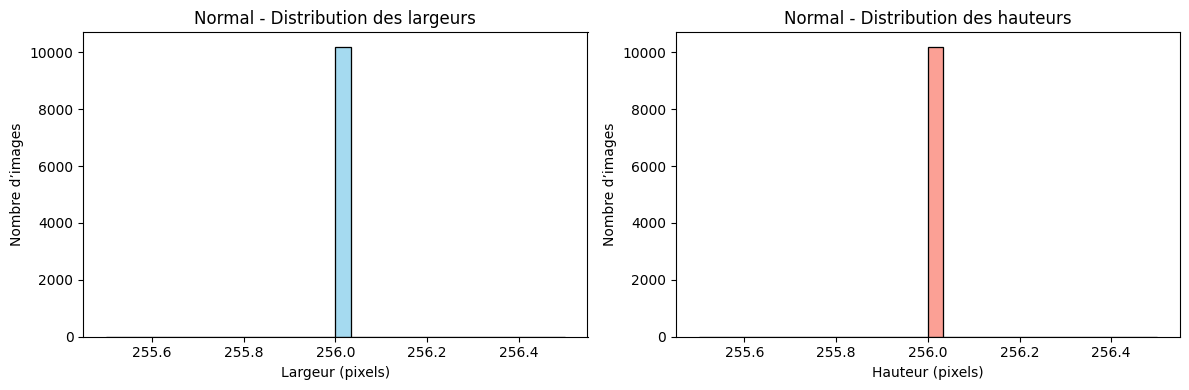

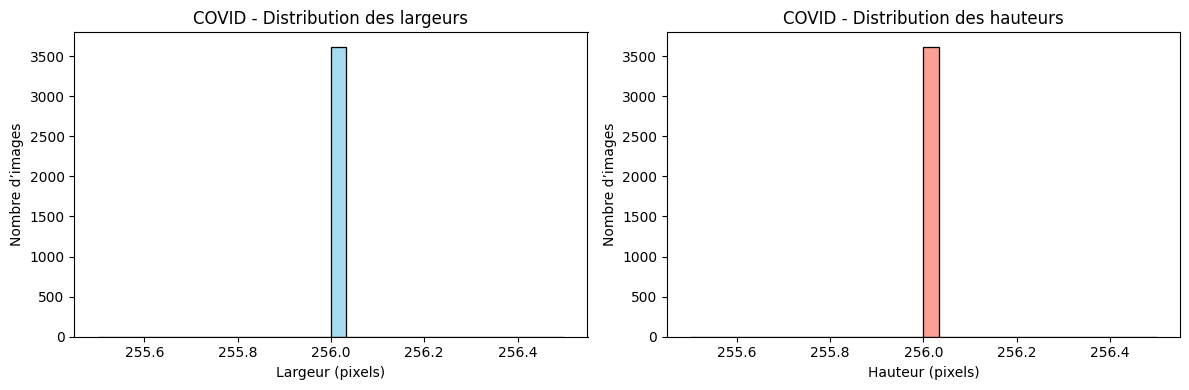

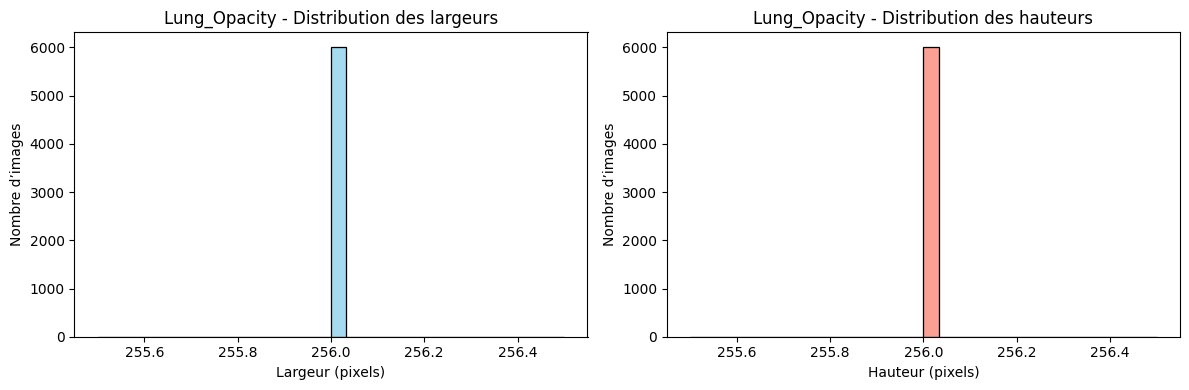

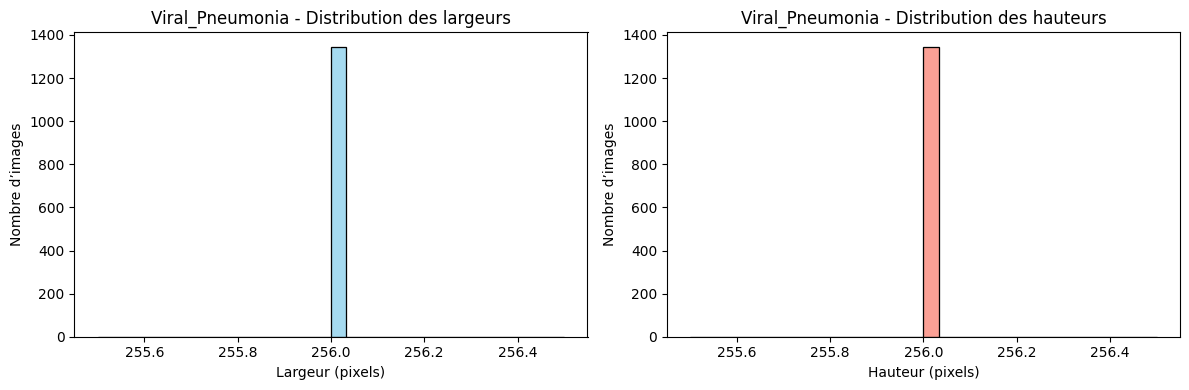

In [6]:
# boucle sur les datasets
for name, df in datasets.items():
    plt.figure(figsize=(12, 4))

    # Histogramme des largeurs
    plt.subplot(1, 2, 1)
    sns.histplot(df['width'], bins=30, color='skyblue')
    plt.title(f"{name} - Distribution des largeurs")
    plt.xlabel("Largeur (pixels)")
    plt.ylabel("Nombre d’images")

    # Histogramme des hauteurs
    plt.subplot(1, 2, 2)
    sns.histplot(df['height'], bins=30, color='salmon')
    plt.title(f"{name} - Distribution des hauteurs")
    plt.xlabel("Hauteur (pixels)")
    plt.ylabel("Nombre d’images")

    # Affichage des deux plots côte à côte
    plt.tight_layout()
    plt.show()

<ul>
<div style="border-left: 5px solid #00ffbf; padding: 10px; background: white;">

Un nuage de points (scatter plot) entre les hauteurs et les largeurs des images pourrait également être réalisé. Cependant, d’après les histogrammes, toutes les images présentent la même largeur et la même hauteur. Le scatter plot ne ferait donc apparaître qu’un seul point, ce qui le rend inutile dans ce contexte.
</div>
</ul>

# Conclusion

Nombre        Format            Taille           
                Images  Masks Images  Masks     Images      Masks
Catégories                                                       
Normal           10192  10192  [PNG]  [PNG]  [299*299]  [256*256]
COVID             3616   3616  [PNG]  [PNG]  [299*299]  [256*256]
Lung Opacity      6012   6012  [PNG]  [PNG]  [299*299]  [256*256]
Viral Pneumonia   1345   1345  [PNG]  [PNG]  [299*299]  [256*256]

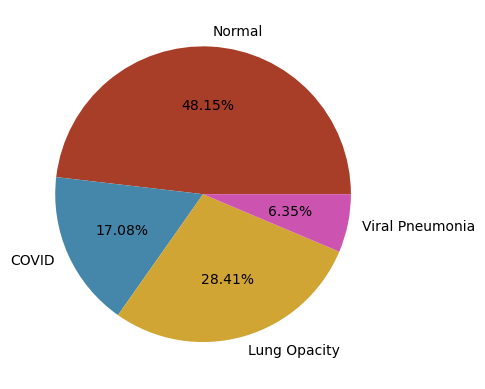

In [40]:
taille_images = {'Normal' : '[299*299]',
              'COVID' : '[299*299]',
              'Lung Opacity' : '[299*299]',
              'Viral Pneumonia' : '[299*299]'}
df_resume = pd.DataFrame({('Nombre','Images'): nb_img,
                          ('Nombre','Masks') : nb_img,
                          ('Format','Images') : format_img,
                          ('Format','Masks') : format_img,
                          ('Taille','Images'): taille_images,
                          ('Taille', 'Masks'): taille_img})
df_resume.index.name = 'Catégories'
display(df_resume)

plt.pie(nb_img.values(), labels=nb_img.keys(), autopct = lambda nb_img: str(nb_img.round(2))+'%' , colors=['#A83E28','#4487AB','#D1A534','#CC54B0'])
plt.show()

Pour résumer, les données sont plutôt uniformes entre les images et les masques excepté pour la taille qu'il faudra homogéiniser.
Il faudra également uniformiser le nombre d'images et de masques par rapport aux catégories. Les disparités étant trop importantes.
Il faudra se décider sur la suppression de certaines donnée ou la "création" de données pour combler les manques de certaines catégories.
La deuxiemme solution semble préférable pour éviter la perte de données et donc potentiellement altérer les performances du modèle.

---